In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.misc import comb

In [0]:
t = tf.placeholder(tf.float64, shape=(None,1), name='time')
alpha = tf.constant(3.5, tf.float64)



In [0]:
sess = tf.Session()

In [0]:
#tf.sqrt
def fct(x):
  return tf.cos(x*10.)
  #return tf.exp(-tf.square(x)/2.)


n=1000.
step = 1./n
rng = np.arange(0., 1., step )
ints = np.arange(0, int(n), 1 )
ts = rng.reshape((int(n),1))

pts =  ints/n
t_pts = tf.convert_to_tensor(pts)

cmbs = comb(int(n), ints)

p1 = tf.convert_to_tensor(ints, dtype=tf.float64)
p2 = tf.convert_to_tensor(int(n)-ints, dtype=tf.float64)


B = fct(t)
B_apx = tf.reduce_sum(cmbs * fct(t_pts) * tf.pow(t,p1) * tf.pow(1-t,p2), axis=1)

h = tf.gradients(B,t)
hapx= tf.gradients(B_apx,t)

hh = tf.gradients(h,t)
hhapx = tf.gradients(hapx,t)


Bs = sess.run(B, feed_dict={t:ts} )
B_apxs = sess.run(B_apx, feed_dict={t:ts} )


hs = sess.run(h, feed_dict={t:ts} )
hapxs = sess.run(hapx, feed_dict={t:ts} )


hhs = sess.run(hh, feed_dict={t:ts} )
hhapxs = sess.run(hhapx, feed_dict={t:ts} )

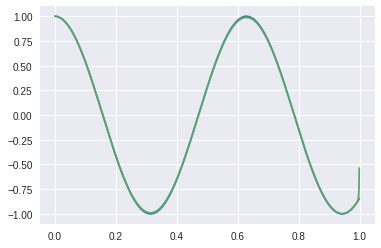

In [178]:
plt.plot(ts, Bs)
plt.plot(ts, B_apxs)


#plt.plot(ts, hhs[0])

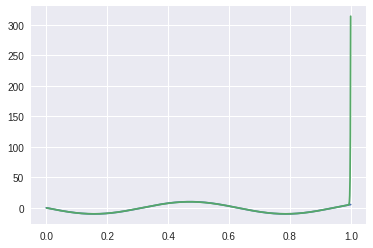

In [179]:
plt.plot(ts, hs[0])
plt.plot(ts, hapxs[0])

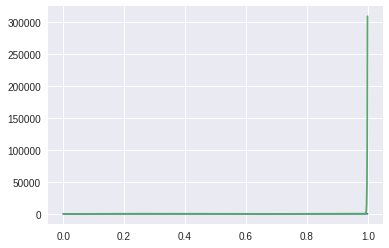

In [180]:
plt.plot(ts, hhs[0])
plt.plot(ts, hhapxs[0])